<a href="https://colab.research.google.com/github/vishu17-vains/ML_projects-/blob/main/machine_learning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MY MACHINE LEARNING PRACTICE COLLECTION


MY most of the machine learning practice are included in this notebook , i make this dedicated one file to showcase my Machine learning practice.(these are the practices during my learning)
ive also used spyder notebook for detailed view of the model data and for better understanding of dataframe and used visual studio code to create frontend for my project using streamlit. ive practiced on various types of datasets and configure almost all regression and classification model.


PRCTICES ARE LISTED BELOW:
1- impolemention of learning i.e., how to implement a model.
2- linear regression
3- logistic regression
4- feature scalling
5- salary prediction using (SVR, KNN, Descision tree, Random forest )
6- titanic project
7- future prediction using SVM using salary dataset.
8- Naive base algorithm practice
9- salary prediction using Naive bayes (objective is to predict wheather income of an individual exceeds $50k per year based on census data)
10- Decision tree classifier practice
11- enssemble learning practice (Random forest, xgboost, adaboost, gradient boosting algorithm)
12- K-means clustring

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset
dataset = pd.read_csv(r"C:\Users\Administrator\Desktop\FSDS\11th - ML\5. Data preprocessing\Data.csv")
dataset.head()

,State,Age,Salary,Purchased
0,Mumbai,44.0,72000.0,No
1,Bangalore,27.0,48000.0,Yes
2,Hyderabad,30.0,54000.0,No
3,Bangalore,38.0,61000.0,No
4,Hyderabad,40.0,NaN,Yes


In [ ]:
dataset

,State,Age,Salary,Purchased
0,Mumbai,44.0,72000.0,No
1,Bangalore,27.0,48000.0,Yes
2,Hyderabad,30.0,54000.0,No
3,Bangalore,38.0,61000.0,No
4,Hyderabad,40.0,NaN,Yes
5,Mumbai,35.0,58000.0,Yes
6,Bangalore,NaN,52000.0,No
7,Mumbai,48.0,79000.0,Yes
8,Hyderabad,50.0,83000.0,No
9,Mumbai,37.0,67000.0,Yes


In [ ]:

# INDEPENDENT VARIABLE
X = dataset.iloc[:, :-1].values
# DEPENDENT VARIABLE
y = dataset.iloc[:,3].values


In [ ]:
print(X)

[['Mumbai' 44.0 72000.0]
 ['Bangalore' 27.0 48000.0]
 ['Hyderabad' 30.0 54000.0]
 ['Bangalore' 38.0 61000.0]
 ['Hyderabad' 40.0 nan]
 ['Mumbai' 35.0 58000.0]
 ['Bangalore' nan 52000.0]
 ['Mumbai' 48.0 79000.0]
 ['Hyderabad' 50.0 83000.0]
 ['Mumbai' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
# Filling the missing numerical value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputer = imputer.fit(X[:,1:3])
X[:, 1:3] = imputer.transform(X[:,1:3])

In [ ]:
# IMPUTE CATEGORICAL VALUE FOR INDEPDENT
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

labelencoder_X.fit_transform(X[:,0])

X[:,0] = labelencoder_X.fit_transform(X[:,0])

In [ ]:
X

array([[2, 44.0, 72000.0],
       [0, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [0, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [2, 35.0, 58000.0],
       [0, 38.77777777777778, 52000.0],
       [2, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [2, 37.0, 67000.0]], dtype=object)

In [ ]:
## IMPUTE CATEGORICAL VALUE FOR DEPENDENT

labelencoder_y = LabelEncoder()

y = labelencoder_y.fit_transform(y)

In [ ]:
y


array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
# spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

In [ ]:
X_train

array([[1, 40.0, 63777.77777777778],
       [2, 37.0, 67000.0],
       [0, 27.0, 48000.0],
       [0, 38.77777777777778, 52000.0],
       [2, 48.0, 79000.0],
       [0, 38.0, 61000.0],
       [2, 44.0, 72000.0],
       [2, 35.0, 58000.0]], dtype=object)

In [ ]:
X_test

array([[1, 30.0, 54000.0],
       [1, 50.0, 83000.0]], dtype=object)

In [ ]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
y_test

array([0, 0])

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

LOGISTIC REGRESSION PRACTICE

Project 1

In [ ]:
# importing the liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset

dataset = pd.read_csv(r"C:\Users\Administrator\Desktop\FSDS\2.LOGISTIC REGRESSION CODE\logit classification.csv")

In [ ]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dataset.shape
# Returns the number of rows and columns in the dataset

(400, 5)

In [ ]:
# splitting the dependent and independent variable
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
# splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
X_test.shape

(80, 2)

In [ ]:
X_train.shape

(320, 2)

In [ ]:
# performing feature scaling
from sklearn.preprocessing import Normalizer
sc = Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Normalizer (-1 to 1 ) and standerd_scaler(-3 to 3)
# Normalize samples individually to unit norm.
# Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently
# of other samples so that its norm (l1, l2 or inf) equals one.

In [ ]:
 # Training the logistic regression model on the trainig set
# The sklearn.linear_model module implements a variety of linear models.

from sklearn.linear_model import LogisticRegression
# logisticRegression also called ( logit and MaxEnt ) classifier.

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicting the test set result

y_pred = classifier.predict(X_test)
# predict() - Predict class labels for samples in X.

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
# confusion matrix
#Compute confusion matrix to evaluate the accuracy of a classification.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[58  0]
 [22  0]]


In [ ]:
 # Model_accuracy
 # Accuracy classification score.

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.725


In [ ]:
 # classification report
# Build a text report showing the main classification metrics.

from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.72        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



D:\anacpnda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacpnda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacpnda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Bias and Varience

bias = classifier.score(X_train, y_train)
bias

0.621875

In [ ]:
# Bias and Varience

varience = classifier.score(X_test, y_test)
varience

0.725

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# as we have build the model , its time for future prediction
dataset1 = pd.read_csv(r"C:\Users\Administrator\Desktop\FSDS\15. Logistic regression with future prediction\Future prediction1.csv")
d2 = dataset1.copy()

In [ ]:
dataset1

array([[    45,  60000],
       [    79,  64000],
       [    23,  78000],
       [    34,  45000],
       [    29,  76000],
       [    70,  89000],
       [    86, 120000],
       [    46,  23000],
       [    32,  70000],
       [   100,  90000]], dtype=int64)

In [ ]:
dataset1 = dataset1.iloc[:, [2, 3]].values

this is the new data on which model will predict the purchase feature.
here purchase feature is binary in nature.

In [ ]:
dataset1

array([[    45,  60000],
       [    79,  64000],
       [    23,  78000],
       [    34,  45000],
       [    29,  76000],
       [    70,  89000],
       [    86, 120000],
       [    46,  23000],
       [    32,  70000],
       [   100,  90000]], dtype=int64)

In [ ]:
# performing feature scalling (using standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
M = sc.fit_transform(dataset1)

In [ ]:
# predicting the future

y_pred1 = pd.DataFrame()


In [ ]:
d2 ['y_pred1'] = classifier.predict(M)

In [ ]:
d2

,User ID,Gender,Age,EstimatedSalary,y_pred1
0,15724611,Male,45,60000,0
1,15725621,Female,79,64000,0
2,15725622,Male,23,78000,0
3,15720611,Female,34,45000,0
4,15588044,Male,29,76000,0
5,15746039,Female,70,89000,0
6,15704887,Male,86,120000,0
7,15746009,Female,46,23000,0
8,15876009,Male,32,70000,0
9,15886009,Female,100,90000,0


Here we can see the model predicted the purchase feature for this new 10 sample of data.


In [ ]:


d2.to_csv('pred_model.csv')

# To get the path
import os
os.getcwd()

'C:\\Users\\Administrator'

here shows my practice of feature scaling
here ill explore both standardization and normalizer techinque

In [ ]:
# Importing the liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset

dataset = pd.read_csv(r"D:\FSDS\11th - ML\5. Data preprocessing\Data.csv")
dataset.head()   # print top 5 sample from the dataframe

,State,Age,Salary,Purchased
0,Mumbai,44.0,72000.0,No
1,Bangalore,27.0,48000.0,Yes
2,Hyderabad,30.0,54000.0,No
3,Bangalore,38.0,61000.0,No
4,Hyderabad,40.0,NaN,Yes


In [ ]:
# slicing the dependent and independent variable from the dataset

x = dataset.iloc[:,:-1].values
print(x)
 # [x] here is independent variable , here it holds three features i.e., state, age and salary

[['Mumbai' 44.0 72000.0]
 ['Bangalore' 27.0 48000.0]
 ['Hyderabad' 30.0 54000.0]
 ['Bangalore' 38.0 61000.0]
 ['Hyderabad' 40.0 nan]
 ['Mumbai' 35.0 58000.0]
 ['Bangalore' nan 52000.0]
 ['Mumbai' 48.0 79000.0]
 ['Hyderabad' 50.0 83000.0]
 ['Mumbai' 37.0 67000.0]]


In [ ]:
# here slicing the dependent variable y

y = dataset.iloc[:,3]
print(y)
# [y] here shows the purchase feature - dependent variable

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object


In [ ]:
# using sklearn to fill missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()


In [ ]:
imputer = imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])

In [ ]:
print(x)

[['Mumbai' 44.0 72000.0]
 ['Bangalore' 27.0 48000.0]
 ['Hyderabad' 30.0 54000.0]
 ['Bangalore' 38.0 61000.0]
 ['Hyderabad' 40.0 63777.77777777778]
 ['Mumbai' 35.0 58000.0]
 ['Bangalore' 38.77777777777778 52000.0]
 ['Mumbai' 48.0 79000.0]
 ['Hyderabad' 50.0 83000.0]
 ['Mumbai' 37.0 67000.0]]


bydefault SimpleImputer uses the mean stratagy to fill the missing values of the dataframe as stratage is not defined in imputer.
we can fill the missing values by defining the stratagy as mean median or mode

In [ ]:
print(y)

0     No
1    Yes
2     No
3     No
4    Yes
5    Yes
6     No
7    Yes
8     No
9    Yes
Name: Purchased, dtype: object


In [ ]:
# imputing categorical value for the independent variable

from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()

labelencoder_X.fit_transform(x[:,0])

array([2, 0, 1, 0, 1, 2, 0, 2, 1, 2])

In [ ]:
x[:,0] = labelencoder_X.fit_transform(x[:,0])

In [ ]:
print(x)

[[2 44.0 72000.0]
 [0 27.0 48000.0]
 [1 30.0 54000.0]
 [0 38.0 61000.0]
 [1 40.0 63777.77777777778]
 [2 35.0 58000.0]
 [0 38.77777777777778 52000.0]
 [2 48.0 79000.0]
 [1 50.0 83000.0]
 [2 37.0 67000.0]]


here we can see that the labelEncoder class of the scikitlearn converted the categorical value feature of the dataframe i.e., state to numerical value

In [ ]:
# spliting the data into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train

array([[1, 40.0, 63777.77777777778],
       [2, 37.0, 67000.0],
       [0, 27.0, 48000.0],
       [0, 38.77777777777778, 52000.0],
       [2, 48.0, 79000.0],
       [0, 38.0, 61000.0],
       [2, 44.0, 72000.0],
       [2, 35.0, 58000.0]], dtype=object)

In [ ]:
x_test

array([[1, 30.0, 54000.0],
       [1, 50.0, 83000.0]], dtype=object)

In [ ]:
y_train

4    Yes
9    Yes
1    Yes
6     No
7    Yes
3     No
0     No
5    Yes
Name: Purchased, dtype: object

In [ ]:
y_test

2    No
8    No
Name: Purchased, dtype: object

In [ ]:
# feature scalling
# 1) Normalizer     ----------- value(-1 to 1 )

from sklearn.preprocessing import Normalizer
sc_x = Normalizer()



In [ ]:
# Fit and transform the training data
x_train_normalized = sc_x.fit_transform(x_train)

# Transform the testing data
x_test_normalized = sc_x.transform(x_test)

In [ ]:
x_train_normalized

array([[1.56794394e-05, 6.27177577e-04, 9.99999803e-01],
       [2.98507417e-05, 5.52238722e-04, 9.99999847e-01],
       [0.00000000e+00, 5.62499911e-04, 9.99999842e-01],
       [0.00000000e+00, 7.45726288e-04, 9.99999722e-01],
       [2.53164510e-05, 6.07594824e-04, 9.99999815e-01],
       [0.00000000e+00, 6.22950699e-04, 9.99999806e-01],
       [2.77777726e-05, 6.11110997e-04, 9.99999813e-01],
       [3.44827523e-05, 6.03448166e-04, 9.99999817e-01]])

In [ ]:
x_test_normalized

array([[1.85185157e-05, 5.55555470e-04, 9.99999846e-01],
       [1.20481906e-05, 6.02409529e-04, 9.99999818e-01]])

In [ ]:
# feature sclaling
# 2) StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   # standardscaler object created \

# scaling the test dataset
x_test_scaled = scaler.fit_transform(x_test)
# scaling the training dataset
x_train_scaled = scaler.fit_transform(x_train)

In [ ]:
# checking the value of x_test after scalling using the StandardScaler
x_test_scaled

array([[ 0., -1., -1.],
       [ 0.,  1.,  1.]])

In [ ]:
# checking the value of x_tarin after scalling using StandardScaler
x_train_scaled

array([[-0.0694829 ,  0.19252237, -0.13849196],
       [ 0.95732543, -1.17058816,  1.08636773],
       [-1.20556614, -0.98394086,  0.93912196],
       [-1.20556614,  2.34888032, -2.40717967],
       [ 0.62878488, -0.16368078,  0.19355568],
       [-1.20556614,  0.11563699, -0.0612918 ],
       [ 0.80712455, -0.09972288,  0.131909  ],
       [ 1.29294646, -0.239107  ,  0.25600903]])

PROJECT - 3 : House price prediction using simple linear regression

In [ ]:
# importing the liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset

dataset = pd.read_csv(r"C:\Users\Administrator\Desktop\FSDS\SLR - House price prediction\House_data.csv")
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
space=dataset['sqft_living']
price=dataset['price']

In [ ]:
space

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [ ]:
price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [ ]:
x = np.array(space).reshape(-1, 1)
y = np.array(price)

In [ ]:
# Spliting the data into train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [ ]:
x_train

array([[1260],
       [1320],
       [ 920],
       ...,
       [2360],
       [2370],
       [2380]], dtype=int64)

In [ ]:
x_test

array([[1430],
       [4670],
       [1440],
       ...,
       [1870],
       [1160],
       [1040]], dtype=int64)

In [ ]:
y_train

array([465750., 575000., 212500., ..., 431000., 411000., 699900.])

In [ ]:
y_test

array([ 297000., 1580000.,  562100., ...,  592500.,  284900.,  380000.])

In [ ]:
# Fitting simple linear regression with the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)     # training the model with train set


LinearRegression()

In [ ]:
# Predicting the future

pred = regressor.predict(x_test)

In [ ]:
pred

array([ 362473.73011981, 1250163.82755554,  365213.51437116, ...,
        483024.23717899,  288499.5553335 ,  255622.14431736])

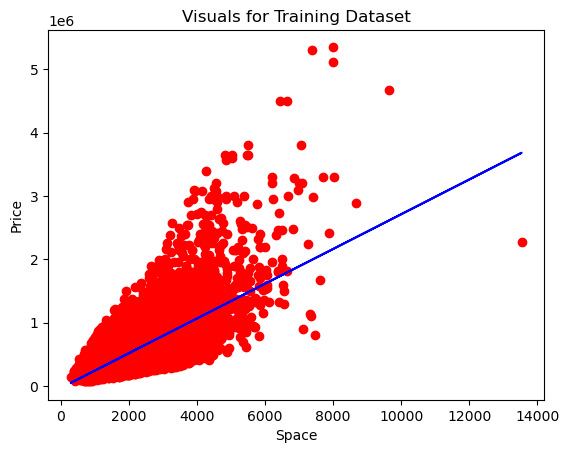

In [ ]:
# visualizing to get insight
# visualising the training set result
plt.scatter(x_train, y_train, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()

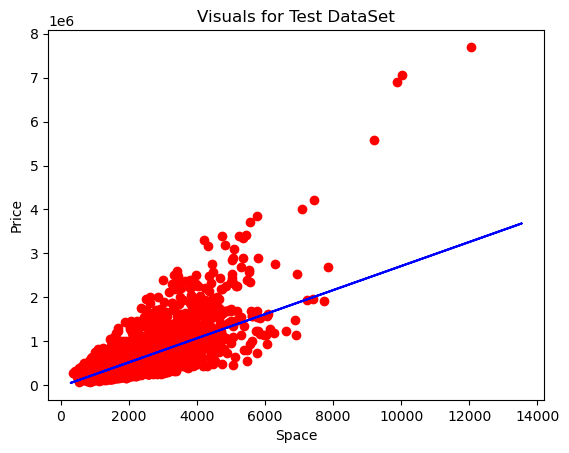

In [ ]:
# visualizing the test set result
plt.scatter(x_test, y_test, color= 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Space")
plt.ylabel("Price")
plt.show()


Project - 4:  SVR, KNN , Decision tree , random forest algorithm practice

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# importing the dataset
dataset = pd.read_csv(r"C:\Users\Administrator\Desktop\FSDS\26th- SVR, KNN\emp_sal.csv")
dataset.head()   # to retrive top 5 rows from the dataframe

,Position,Level,Salary
0,Jr Software Engineer,1,45000
1,Sr Software Engineer,2,50000
2,Team Lead,3,60000
3,Manager,4,80000
4,Sr manager,5,110000


In [ ]:
# slicing the dependent and independent variable
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [ ]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [ ]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [ ]:
# fitting svr to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly',degree = 4)
regressor.fit(X, y)

SVR(degree=4, kernel='poly')

In [ ]:
y_pred_svr = regressor.predict([[6.5]])

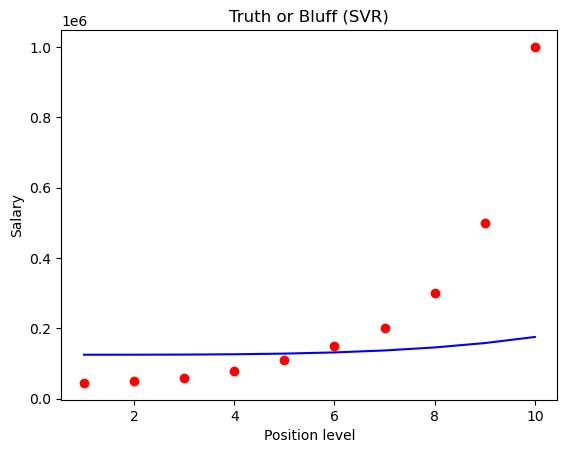

In [ ]:
 # visualizing the SVR result
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\194348856.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled


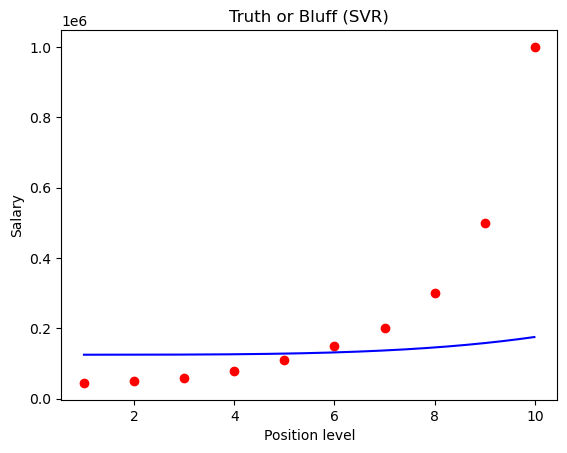

In [ ]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# checking the values using KNN
from sklearn.neighbors import KNeighborsRegressor
regressor_knn = KNeighborsRegressor(n_neighbors=4)
regressor_knn.fit(X,y)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
y_pred_knn = regressor_knn.predict([[6.5]])

In [ ]:
y_pred_knn

array([190000.])

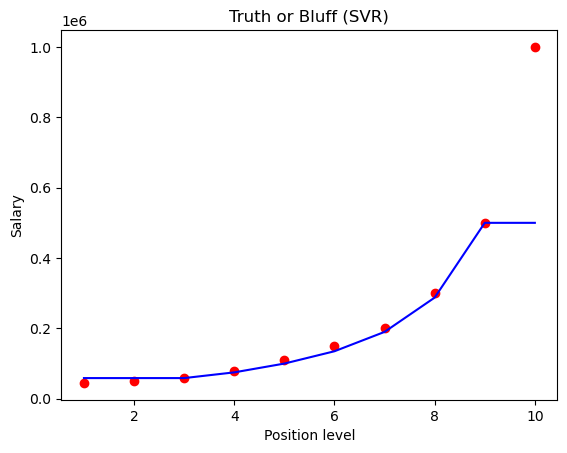

In [ ]:
# Visualising the KNN results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor_knn.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\1664423984.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled


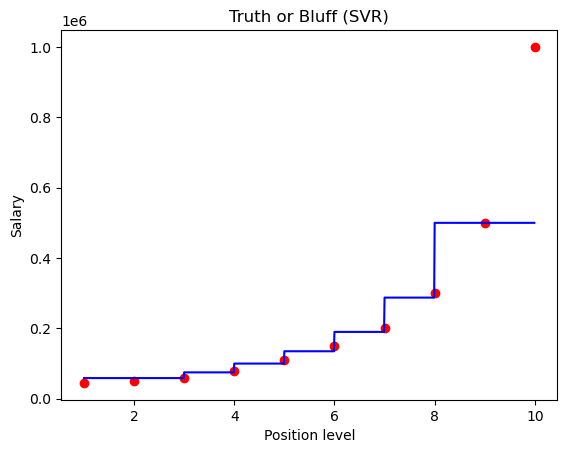

In [ ]:
# Visualising the KNN results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor_knn.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# now lets see that how things work if we use Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(splitter="random",criterion='absolute_error')
regressor_dt.fit(X,y)

DecisionTreeRegressor(criterion='absolute_error', splitter='random')

In [ ]:
y_pred_dtr = regressor_dt.predict([[6.5]])

In [ ]:
y_pred_dtr

array([150000.])

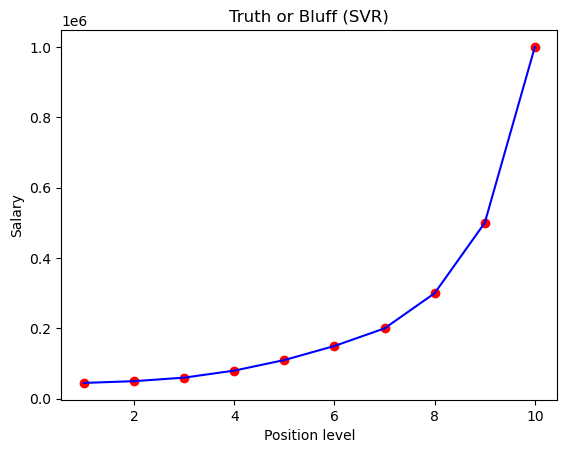

In [ ]:
# Visualising the decision tree egressor results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor_dt.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\1835033559.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled


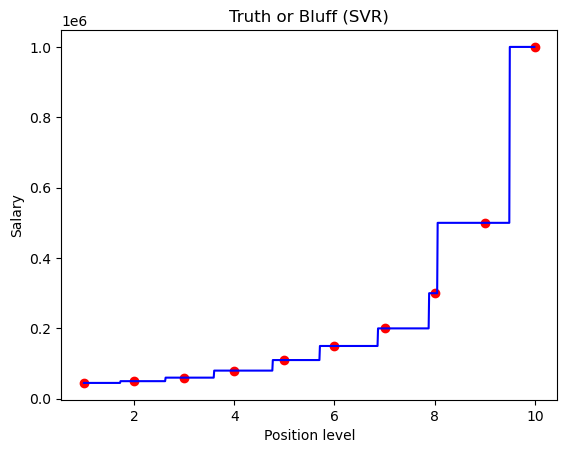

In [ ]:
# Visualising the Decision tree regressor  results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor_dt.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
# lets see how things work if we use random forest
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state=0, n_estimators = 50)
reg_rf.fit(X,y)

RandomForestRegressor(n_estimators=50, random_state=0)

In [ ]:
y_pred_rf = reg_rf.predict([[6.5]])


In [ ]:
y_pred_rf

array([161200.])

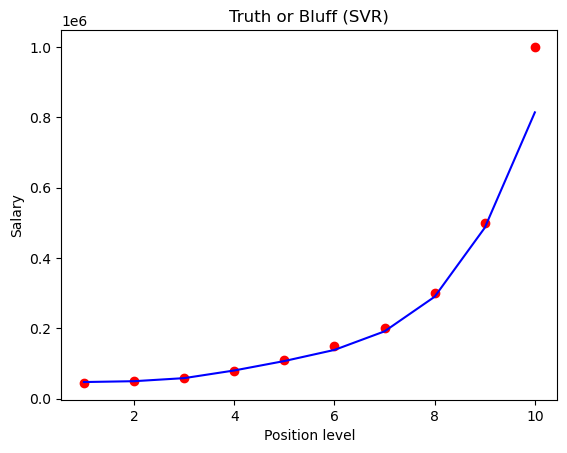

In [ ]:
# Visualising the random forest results
plt.scatter(X, y, color = 'red')
plt.plot(X, reg_rf.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\37081188.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled


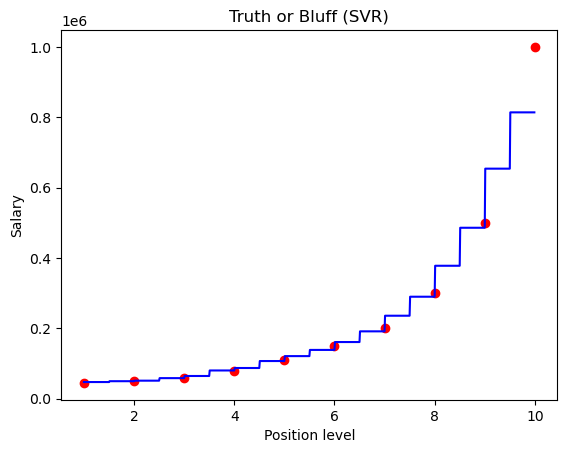

In [ ]:
# Visualising the random forest results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, reg_rf.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

project - 5:- TITANIC analysis

In [ ]:
# importing the Liabraries
import numpy as np
import pandas as pd


In [ ]:
# importing the dataset
titanic = pd.read_csv(r"C:\Users\Administrator\Desktop\FSDS\11th - ML\TITANIC PROJECT\DATASET\titanic dataset.csv")

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# performing data cleaning and analysis
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# name ciolumn cannot decide survival of a person, so we can safely delete it
del titanic["Name"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# ticket cannot decide survival of a person , so we can safely delete it
del titanic["Ticket"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
# fare cannot decide the survival of a person , so we can safely delete it
del titanic["Fare"]
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,1,0,3,male,22.0,1,0,NaN,S
1,2,1,1,female,38.0,1,0,C85,C
2,3,1,3,female,26.0,0,0,NaN,S
3,4,1,1,female,35.0,1,0,C123,S
4,5,0,3,male,35.0,0,0,NaN,S


In [ ]:
del titanic['Cabin']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [ ]:
# Changing Value for "Male, Female" string values to numeric values , male=1 and female=2
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
titanic["Gender"]=titanic["Sex"].apply(getNumber)
#We have created a new column called "Gender" and
#filling it with values 1,2 based on the values of sex column
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [ ]:
#Deleting Sex column, since no use of it now
del titanic["Sex"]
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [ ]:
# checking either any column holds null values or not
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

here it is clearly shown that age column holds the null values

In [ ]:
# filling the null values of the age column
meanS= titanic[titanic.Survived==1].Age.mean()
meanS

#using mean to fill the null values

28.343689655172415

In [ ]:
# crreating the new age column
titanic["age"]=np.where(pd.isnull(titanic.Age) & titanic["Survived"]==1  ,meanS, titanic["Age"])
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age            125
dtype: int64

In [ ]:
# Finding the mean age of "Not Survived" people
meanNS=titanic[titanic.Survived==0].Age.mean()
meanNS

30.62617924528302

In [ ]:
titanic.age.fillna(meanNS,inplace=True)
titanic.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\1157731433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic.age.fillna(meanNS,inplace=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender,age
0,1,0,3,22.0,1,0,S,1,22.0
1,2,1,1,38.0,1,0,C,2,38.0
2,3,1,3,26.0,0,0,S,2,26.0
3,4,1,1,35.0,1,0,S,2,35.0
4,5,0,3,35.0,0,0,S,1,35.0


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
age              0
dtype: int64

In [ ]:
del titanic['Age']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [ ]:
# Finding the number of people who have survived
# given that they have embarked or boarded from a particular port

survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

30
93
217


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3300902897.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 1].shape[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3300902897.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 1].shape[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3300902897.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 1].shape[0]


In [ ]:
survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]
print(survivedQ)
print(survivedC)
print(survivedS)

47
75
427


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3240960939.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedQ = titanic[titanic.Embarked == 'Q'][titanic.Survived == 0].shape[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3240960939.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedC = titanic[titanic.Embarked == 'C'][titanic.Survived == 0].shape[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3240960939.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survivedS = titanic[titanic.Embarked == 'S'][titanic.Survived == 0].shape[0]


In [ ]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [ ]:
#Renaming "age" and "gender" columns
titanic.rename(columns={'age':'Age'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [ ]:
titanic.rename(columns={'Gender':'Sex'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [ ]:
def getEmb(str):
    if str=="S":
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
titanic["Embark"]=titanic["Embarked"].apply(getEmb)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age,Embark
0,1,0,3,1,0,S,1,22.0,1
1,2,1,1,1,0,C,2,38.0,3
2,3,1,3,0,0,S,2,26.0,1
3,4,1,1,1,0,S,2,35.0,1
4,5,0,3,0,0,S,1,35.0,1


In [ ]:
del titanic['Embarked']
titanic.rename(columns={'Embark':'Embarked'}, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


577
312


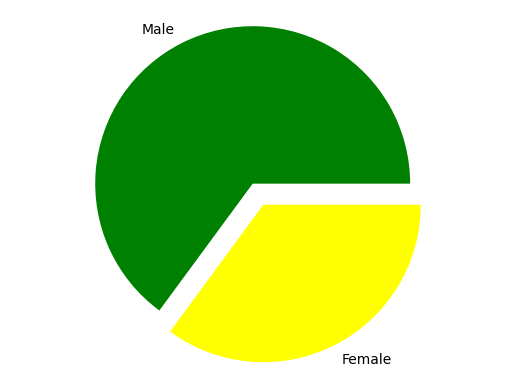

In [ ]:
#Drawing a pie chart for number of males and females aboard
import matplotlib.pyplot as plt
from matplotlib import style

males = (titanic['Sex'] == 1).sum()
#Summing up all the values of column gender with a
#condition for male and similary for females
females = (titanic['Sex'] == 2).sum()
print(males)
print(females)
p = [males, females]
plt.pie(p,    #giving array
       labels = ['Male', 'Female'], #Correspndingly giving labels
       colors = ['green', 'yellow'],   # Corresponding colors
       explode = (0.15, 0),    #How much the gap should me there between the pies
       startangle = 0)  #what start angle should be given
plt.axis('equal')
plt.show()

In [ ]:
# More Precise Pie Chart
MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
print(MaleS)
MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
print(MaleN)
FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
print(FemaleS)
FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(FemaleN)

109
468
231
81


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3105620411.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3105620411.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MaleN=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3105620411.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11276\3105620411.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FemaleN=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]


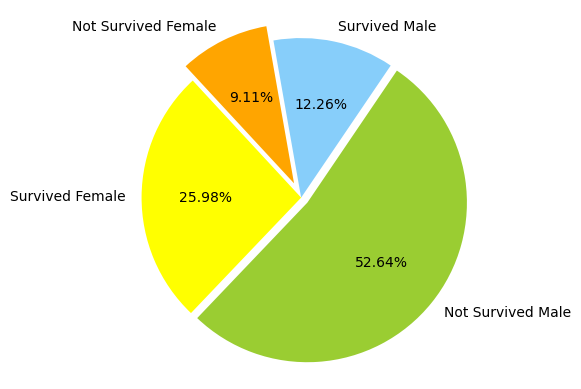

In [ ]:
chart=[MaleS,MaleN,FemaleS,FemaleN]
colors=['lightskyblue','yellowgreen','Yellow','Orange']
labels=["Survived Male","Not Survived Male","Survived Female","Not Survived Female"]
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False,autopct="%.2f%%")
plt.axis("equal")
plt.show()

PRACTICE- 5: FUTURE PREDICTION USING SUPPORT VECTOR MACHINE

In [ ]:
# IMPORTING THE LIABRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# slicing [x] from the dataset
x = dataset.iloc[:, [2, 3]].values


In [ ]:
# slicing [y] from the dataset
y = dataset.iloc[:,4]

In [ ]:
# spliting the dataset into train test and split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train, x_test)


array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [ ]:

# training the svm model on training set
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

In [ ]:

# predicting the test set result
y_pred = classifier.predict(x_test)

In [ ]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[56  2]
 [12 10]]


In [ ]:
# checking the accuracy

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)

0.825


In [ ]:

# bias
bias = classifier.score(x_train, y_train)
print(bias)


0.7625


In [ ]:
# varience
varience = classifier.score(x_test, y_test)
print(varience)

0.825


In [ ]:
# FUTURE PREDICTION USING THIS MODEL


In [ ]:
# IMPORTING THE DATASET
dataset1 = pd.read_csv("Future prediction1.csv")
dataset1.head()

,User ID,Gender,Age,EstimatedSalary
0,15724611,Male,45,60000
1,15725621,Female,79,64000
2,15725622,Male,23,78000
3,15720611,Female,34,45000
4,15588044,Male,29,76000


In [ ]:
print(dataset1)

    User ID  Gender  Age  EstimatedSalary
0  15724611    Male   45            60000
1  15725621  Female   79            64000
2  15725622    Male   23            78000
3  15720611  Female   34            45000
4  15588044    Male   29            76000
5  15746039  Female   70            89000
6  15704887    Male   86           120000
7  15746009  Female   46            23000
8  15876009    Male   32            70000
9  15886009  Female  100            90000


In [ ]:
# creating the copy of dataset1
d2 = dataset1.copy()

In [ ]:
# slicing the dataset1 on which model will poredict purchase feature
dataset1 = dataset1.iloc[:,[2,3]]

In [ ]:
dataset1

,Age,EstimatedSalary
0,45,60000
1,79,64000
2,23,78000
3,34,45000
4,29,76000
5,70,89000
6,86,120000
7,46,23000
8,32,70000
9,100,90000


In [ ]:
# Next step is feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
m = sc.fit_transform(dataset1)

In [ ]:
y_pred1 = pd.DataFrame()

In [ ]:
print(m)

[[-0.36494467 -0.4578622 ]
 [ 0.95506797 -0.29860578]
 [-1.2190705   0.25879168]
 [-0.79200759 -1.05507376]
 [-0.98612709  0.17916347]
 [ 0.60565286  0.69674682]
 [ 1.22683528  1.93098404]
 [-0.32612077 -1.93098404]
 [-0.86965539 -0.05972116]
 [ 1.7703699   0.73656092]]


In [ ]:
d2 ['y_pred1'] = classifier.predict(m)

In [ ]:
d2

,User ID,Gender,Age,EstimatedSalary,y_pred1
0,15724611,Male,45,60000,0
1,15725621,Female,79,64000,0
2,15725622,Male,23,78000,0
3,15720611,Female,34,45000,0
4,15588044,Male,29,76000,0
5,15746039,Female,70,89000,0
6,15704887,Male,86,120000,0
7,15746009,Female,46,23000,0
8,15876009,Male,32,70000,0
9,15886009,Female,100,90000,0


PROJECT : 6 - NAIVE BAYES PRACTICE

In [ ]:
# importing the liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# importing the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# slicing the dependent and independent variable from the dataset
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,4]

In [ ]:
# spliting the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
# feature scaling
from sklearn.preprocessing import Normalizer
sc = Normalizer()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:

# training the naive bayes model on the training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:

# predicting the test set result
y_pred = classifier.predict(X_test)

In [ ]:

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58  0]
 [22  0]]


In [ ]:
# accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)

0.725


In [ ]:
# Bias
bias = classifier.score(X_train, y_train)
print(bias)


0.621875


In [ ]:
# varience
varience = classifier.score(X_test, y_test)
print(varience)

0.725


PROJECT -6 : TO PREDICT WHETHER INCOME OF AN INDIVIDUAL EXCEEDS $50K PER YEAR BASED ON CENSUS DATA USING NAVE BAYES ALGORITHM

ML Case Study
Please use Python for the following. Document your steps and state any assumptions you make. A single Jupyter notebook file (.ipynb) with your approach and code is sufficient. Make sure it is commented and easy to follow. If you prefer, you can submit a text document with your analysis too.
The data for the case study comes from the Census Income data set in the UCI Machine Learning Repository. Your objective is to predict whether income of an individual exceeds $50K/per year based on census data. More importantly the objective for you is to demonstrate how you tackle a traditional supervised learning problem.
1)	Download the data from the following link http://archive.ics.uci.edu/ml/datasets/Adult into Python.
2)	Read the Attribute Information from the web page. More information can be found in the Data Set Description.
3)	Be sure to document your steps and your rationale behind each one of them. This is best done with Jupyter notebook or a word document.
4)	Predict the class variable using the given attributes. Use two supervised learning methods. Avoid over-fitting.
5)	 Assess the performance of your models using appropriate metrics. Discuss which model is best and why.
6)	Please provide an explanation in plain English of the business problem you were trying to solve and your analysis of the outcomes.  Please add any supporting visualizations to support your explanation.
7)	This is intentionally left somewhat open-ended. We want to see how you approach the problem.


In [ ]:
# importing the liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# importing the dataset
df = pd.read_csv("adult.csv")

In [ ]:
df.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
# Renaming the columns name
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
# again preview the data
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [ ]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [ ]:
# check missing values in categorical variables

df[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0
income,0


In [ ]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [ ]:
# check labels in workclass variable

df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
# replace '?' values in workclass variable with `NaN`


df['workclass'].replace('?', np.NaN, inplace=True)

In [ ]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
# check labels in occupation variable

df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

In [ ]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
?,1843
Transport-moving,1597


In [ ]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace('?', np.NaN, inplace=True)

In [ ]:
# again checking the frequency distribution of values in occupation variable

df.occupation.value_counts()

,count
occupation,
Prof-specialty,4140
Craft-repair,4099
Exec-managerial,4066
Adm-clerical,3770
Sales,3650
Other-service,3295
Machine-op-inspct,2002
Transport-moving,1597
Handlers-cleaners,1370


In [ ]:
# check labels in native_country variable

df.native_country.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [ ]:
# checking the frequency distribution of values in native_country variable

df.native_country.value_counts()

,count
native_country,
United-States,29170
Mexico,643
?,583
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100


In [ ]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace('?', np.NaN, inplace=True)

In [ ]:
# again checking the frequency distribution of values in native_country variable

df.native_country.value_counts()

,count
native_country,
United-States,29170
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


In [ ]:
# Checking missing values in cateforical data
df[categorical].isnull().sum()

,0
workclass,1836
education,0
marital_status,0
occupation,1843
relationship,0
race,0
sex,0
native_country,583
income,0


In [ ]:
# checking for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [ ]:
# finding numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [ ]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18
2,66,186061,10,0,4356,40
3,54,140359,4,0,3900,40
4,41,264663,10,0,3900,40


In [ ]:
# check missing values in numerical variables

df[numerical].isnull().sum()

,0
age,0
fnlwgt,0
education_num,0
capital_gain,0
capital_loss,0
hours_per_week,0


In [ ]:
# DECLARATION OF FEATURE VECTOR AND TARGET VARIABLE
X = df.drop(['income'], axis=1)

y = df['income']

In [ ]:
# spliting X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [ ]:
# from here ive performed feature enginnering
# check data types in X_train

X_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [ ]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [ ]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [ ]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

,0
workclass,0.056774
education,0.000000
marital_status,0.000000
occupation,0.057038
relationship,0.000000
race,0.000000
sex,0.000000
native_country,0.018208


In [ ]:
# categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.056774306774306775
occupation 0.057037557037557036
native_country 0.018208143208143207


In [ ]:
# imputing missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [ ]:
# checking missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [ ]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

,0
workclass,0
education,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0
native_country,0


In [ ]:
# checking missing values in X_train

X_train.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# checkingissing values in X_test

X_test.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
# print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [ ]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,State-gov,Bachelors,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
25206,Local-gov,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
23491,Private,Some-college,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
12367,Local-gov,HS-grad,Never-married,Farming-fishing,Own-child,White,Male,United-States
7054,Federal-gov,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States


In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
32098,40,State-gov,31627,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States
25206,39,Local-gov,236391,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States
23491,42,Private,194710,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
12367,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States
7054,38,Federal-gov,99527,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


In [ ]:
X_train.shape

(22792, 14)

In [ ]:
X_test.shape

(9769, 14)

In [ ]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
22278,56,Private,274475,9th,5,Widowed,Sales,Unmarried,White,Female,0,0,40,United-States
8950,19,Private,237455,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,25,United-States
7838,23,Private,125491,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Female,0,0,35,Vietnam
16505,37,Federal-gov,48779,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
19140,49,Private,423222,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States


In [ ]:
cols = X_train.columns

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
#Import the OneHotEncoder and ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


--7TH PRACTICE - DECISION TREEALGORITHM

In [ ]:
# Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# IMPORTING THE DATATSET
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# spliting the dataset into dependent and independent variable
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,4]

In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54  4]
 [ 3 19]]


In [ ]:
# checking the accuracy score

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)

0.9125


In [ ]:
# Bias

bias = classifier.score(X_train, y_train)
bias


0.996875

In [ ]:
 #varience
variance = classifier.score(X_test, y_test)
variance


0.9125

XGBOOST PRACTICE

In [ ]:
# XGBoost

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# importing the dataset
dataset = pd.read_csv("Churn_Modelling.csv")

In [ ]:
dataset.head()

,apst,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,delhi,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,bangalore,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,delhi,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,delhi,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,bangalore,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# slicing the dependent and independent variable.
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[619, 'delhi', 'Female', ..., 1, 1, 101348.88],
       [608, 'bangalore', 'Female', ..., 0, 1, 112542.58],
       [502, 'delhi', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'delhi', 'Female', ..., 0, 1, 42085.58],
       [772, 'mumbai', 'Male', ..., 1, 0, 92888.52],
       [792, 'delhi', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
# Encoding categorical data
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'delhi' 0 ... 1 1 101348.88]
 [608 'bangalore' 0 ... 0 1 112542.58]
 [502 'delhi' 0 ... 1 0 113931.57]
 ...
 [709 'delhi' 0 ... 0 1 42085.58]
 [772 'mumbai' 1 ... 1 0 92888.52]
 [792 'delhi' 0 ... 1 0 38190.78]]


In [ ]:
# One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)


[[0.0 1.0 0.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [0.0 1.0 0.0 ... 1 0 113931.57]
 ...
 [0.0 1.0 0.0 ... 0 1 42085.58]
 [0.0 0.0 1.0 ... 1 0 92888.52]
 [0.0 1.0 0.0 ... 1 0 38190.78]]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
y_train.shape

(8000,)

In [ ]:
y_test.shape

(2000,)

In [ ]:
!pip install --upgrade scikit-learn xgboost
# Ensure XGBoost is installed
!pip install xgboost

# Import XGBClassifier from xgboost
from xgboost import XGBClassifier

# Create the XGBoost classifier
classifier = XGBClassifier()

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)


bias = classifier.score(X_train,y_train)
bias


NameError: name 'X_train' is not defined

RANDOM FOREST PRACTICE

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# importing the dataset
dataset = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# slicing the dependent and independent variable from the dataset
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [ ]:
X

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='entropy', n_estimators=70, random_state=0,max_depth=6)
#classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=70,
                       random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[55  3]
 [ 1 21]]


In [ ]:

from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)

0.95


In [ ]:
bias=classifier.score(X_train, y_train)
bias

0.94375

In [ ]:

variance = classifier.score(X_test, y_test)
variance

0.95